In [1]:
import pandas as pd

In [9]:
imagtt = pd.read_csv("C:/Users/srira/Downloads/CUB_200_2011 (1)/CUB_200_2011/attributes/image_attribute_labels.txt",
                    sep=r"\s+",header=None,usecols=[0,1,2],names=['imgid','attid','present'],engine='python')

In [10]:
imagtt.head()

imgid  attid  present
0      1      1        0
1      1      2        0
2      1      3        0
3      1      4        0
4      1      5        1

In [12]:
imagtt.shape

(3677856, 3)

In [13]:
imagtt2 = imagtt.pivot(index = 'imgid',columns='attid',values='present')

In [14]:
imagtt2.head()

attid  1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
1        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
5        0    0    0    0    1    0    0    0    0    0  ...    0    0    1   

attid  306  307  308  309  310  311  312  
imgid                                     
1        0    0    1    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    1    0    0    1    0  
4        1    0    0    1    0    0    0  
5        0    0    0    0    0    0    0  

[5 rows x 312 columns]

In [16]:
imagtt2.shape

(11788, 312)

In [19]:
imglabels = pd.read_csv("C:/Users/srira/Downloads/CUB_200_2011 (1)/CUB_200_2011/image_class_labels.txt",
                        sep=' ',header = None,names = ['imgid','label'])

In [20]:
imglabels = imglabels.set_index('imgid')

In [22]:
imglabels.shape

(11788, 1)

In [24]:
imglabels.head()

label
imgid       
1          1
2          1
3          1
4          1
5          1

In [25]:
df = imagtt2.join(imglabels)
df = df.sample(frac=1)

In [26]:
df_att = df.iloc[:,:312]
df_label = df.iloc[:,312:]

In [27]:
df.shape

(11788, 313)

In [28]:
df.head()

1  2  3  4  5  6  7  8  9  10  ...  304  305  306  307  308  309  310  \
imgid                                 ...                                      
10954  0  0  0  0  0  0  0  1  0   0  ...    0    0    0    0    1    0    0   
5979   0  1  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    1    0   
7836   0  0  0  0  0  0  1  0  0   0  ...    0    1    0    0    0    1    0   
11074  0  1  0  0  0  0  0  0  0   0  ...    0    0    0    1    0    0    1   
2437   0  0  0  0  0  0  0  1  0   0  ...    0    0    0    0    0    0    0   

       311  312  label  
imgid                   
10954    0    0    186  
5979     0    0    103  
7836     0    0    134  
11074    0    0    189  
2437     0    1     43  

[5 rows x 313 columns]

In [29]:
df_att.head()

1    2    3    4    5    6    7    8    9    10   ...  303  304  305  \
imgid                                                    ...                  
10954    0    0    0    0    0    0    0    1    0    0  ...    0    0    0   
5979     0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
7836     0    0    0    0    0    0    1    0    0    0  ...    0    0    1   
11074    0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2437     0    0    0    0    0    0    0    1    0    0  ...    0    0    0   

       306  307  308  309  310  311  312  
imgid                                     
10954    0    0    1    0    0    0    0  
5979     0    0    0    1    0    0    0  
7836     0    0    0    1    0    0    0  
11074    0    1    0    0    1    0    0  
2437     0    0    0    0    0    0    1  

[5 rows x 312 columns]

In [30]:
df_label.head()

label
imgid       
10954    186
5979     103
7836     134
11074    189
2437      43

In [31]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features = 50,random_state=0,n_estimators = 100)

In [33]:
clf.fit(df_train_att,df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [35]:
print(clf.predict(df_train_att))

[186 103 134 ...  22 133 140]


In [36]:
clf.score(df_test_att,df_test_label)

0.4514255543822598

In [42]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label,pred_labels)
cm

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  0,  0,  0],
       [ 1,  1,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  1,  0],
       [ 1,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0, 21]], dtype=int64)

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #     plt.text(j, i, format(cm[i, j], fmt),
    #              horizontalalignment="center",
    #              color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [44]:
birds = pd.read_csv("C:/Users/srira/Downloads/CUB_200_2011 (1)/CUB_200_2011/classes.txt",
                   sep=r"\s+",header=None,usecols=[1],names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [45]:
import numpy as np
np.set_printoptions(precision = 2)
plt.figure(figsize=(60,60),dpi=300)
plot_confusion_matrix(cm,classes=birds,normalize=True)
plt.show()

Normalized confusion matrix
[[0.54 0.   0.   ... 0.   0.   0.  ]
 [0.   0.64 0.   ... 0.   0.   0.  ]
 [0.06 0.06 0.47 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.09 0.05 0.  ]
 [0.08 0.   0.   ... 0.   0.31 0.  ]
 [0.   0.   0.   ... 0.   0.   0.91]]


In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)

rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts), 4), float)

i = 0

for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)

        rf_params[i, 0] = max_features
        rf_params[i, 1] = n_estimators
        rf_params[i, 2] = scores.mean()
        rf_params[i, 3] = scores.std() * 2

        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % 
              (max_features, n_estimators, scores.mean(), scores.std() * 2))

        i += 1


Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.36 (+/- 0.03)
Max features: 5, num estimators: 50, accuracy: 0.40 (+/- 0.04)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.03)
Max features: 5, num estimators: 90, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 150, accuracy: 0.43 (+/- 0.03)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.03)
Max features: 5, num estimators: 190, accuracy: 0.44 (+/- 0.03)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.01)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.02)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.03)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.03)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.03)
Max features: 10, num estimators: 110, accura

KeyboardInterrupt: 

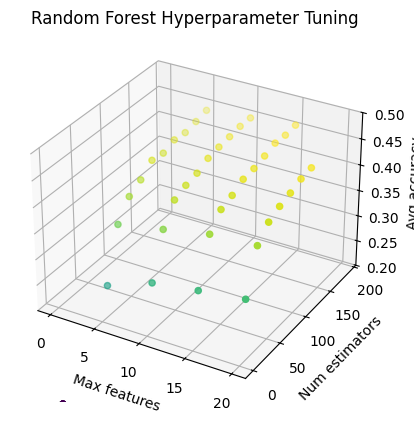

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.clf()

ax = fig.add_subplot(111, projection='3d')  # Correct way to get 3D axis

x = rf_params[:, 0]
y = rf_params[:, 1]
z = rf_params[:, 2]

ax.scatter(x, y, z, c=z, cmap=cm.viridis)

ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')

plt.title('Random Forest Hyperparameter Tuning')
plt.show()
